#Complete EDA and Preprocessing Workflow


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os

In [2]:
df = pd.read_csv('rain_data_mechanical_master.csv')
df.head()

,Time,device_frmpayload_data_rainfall
0,2023-11-22 18:27:26,800 µm
1,2023-11-22 18:30:26,1.40 mm
2,2023-11-22 18:33:26,1 mm
3,2023-11-22 18:36:26,1.40 mm
4,2023-11-22 18:39:26,200 µm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_path = "/content/drive/MyDrive/rainfall_sound_8k.zip"
extract_path = "/content/drive/MyDrive/extracted_folder"

!unzip -q "$zip_path" -d "$extract_path"

In [11]:
for root, dirs, files in os.walk("/content/drive/MyDrive/extracted_folder"):
    print(root, len(files))

/content/drive/MyDrive/extracted_folder 0
/content/drive/MyDrive/extracted_folder/rainfall_sound_8k 14678


In [12]:
audio_folder = "/content/drive/MyDrive/extracted_folder/rainfall_sound_8k"


In [13]:
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]
len(audio_files)


14678

## Task 1

### a. What is the sampling rate?

In [14]:
audio_data, sample_rate = librosa.load(os.path.join(audio_folder, audio_files[0]),sr=None)
print("sample_rate:", sample_rate)


sample_rate: 8000


### b. What is the length (in samples) of individual audio files?

In [15]:
lengths = []
for files in audio_files:
  audio_data,sample_rate = librosa.load(os.path.join(audio_folder, files),sr=None)
  lengths.append(len(audio_data))
print(lengths)




[80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000, 80000

### c. Share a line plot of time vs. rainfall & label axis properly

In [16]:
def convert_rainfall(value):
    value = str(value).strip()

    if "mm" in value:
        return float(value.replace("mm", "").strip())

    if "µm" in value:
        return float(value.replace("µm", "").strip()) / 1000

    return None

df["rainfall_mm"] = df["device_frmpayload_data_rainfall"].apply(convert_rainfall)


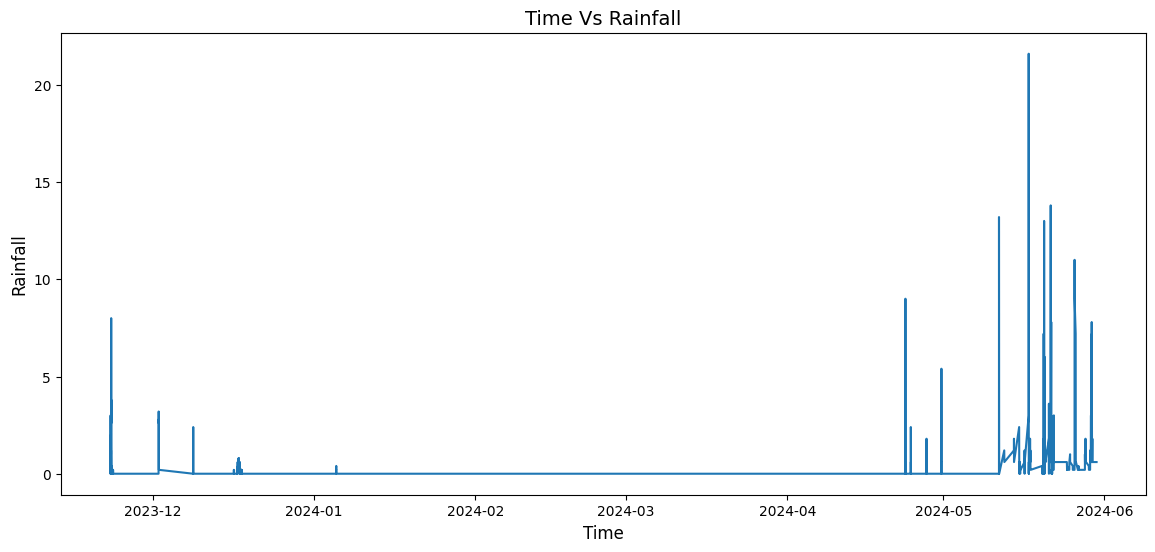

In [17]:
df['timestamp'] = pd.to_datetime(df['Time'])
df = df.sort_values('timestamp')

plt.figure(figsize=(14, 6))

x = df['timestamp']
y = df["rainfall_mm"]

plt.plot(x, y, linewidth=1.5)

plt.title('Time Vs Rainfall', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Rainfall', fontsize=12)


plt.show()

### d. On which date was the maximum and minimum (non-zero) rainfall observed?

In [18]:
rainfall_non_zero = df[df['rainfall_mm'] > 0]

max_rainfall_index = df['rainfall_mm'].idxmax()
max_rainfall_date = rainfall_non_zero.loc[max_rainfall_index, 'timestamp']
max_val = rainfall_non_zero.loc[max_rainfall_index, 'rainfall_mm']
print(f"Maximum rainfall: ",max_val, "on",max_rainfall_date)


min_rainfall_index = rainfall_non_zero['rainfall_mm'].idxmin()
min_rainfall_date = rainfall_non_zero.loc[min_rainfall_index, 'timestamp']
min_val = rainfall_non_zero.loc[min_rainfall_index, 'rainfall_mm']
print(f"Minimum rainfall: ",min_val, "on",min_rainfall_date)



Maximum rainfall:  21.6 on 2024-05-17 10:26:07
Minimum rainfall:  0.2 on 2023-11-22 18:39:26


## Task 2

In [43]:
from datetime import datetime, timedelta
audio_info = []

for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        name = file.replace(".wav", "")
        t = datetime.strptime(name, "%Y_%m_%d_%H_%M_%S_%f")
        audio_info.append((t, file))

audio_df = pd.DataFrame(audio_info, columns=["audio_ts", "filename"])
audio_df = audio_df.sort_values("audio_ts")


In [44]:
audio_df.head()

,audio_ts,filename
0,2023-11-22 18:24:26.836772,2023_11_22_18_24_26_836772.wav
1,2023-11-22 18:24:36.917269,2023_11_22_18_24_36_917269.wav
2,2023-11-22 18:24:46.992185,2023_11_22_18_24_46_992185.wav
3,2023-11-22 18:24:57.147591,2023_11_22_18_24_57_147591.wav
4,2023-11-22 18:25:07.224895,2023_11_22_18_25_07_224895.wav


In [62]:
def get_audio_for_timestamp(ts):
    start_time = ts - timedelta(minutes=3)
    return audio_df[(audio_df.audio_ts >= start_time) & (audio_df.audio_ts <= ts)]


In [63]:
def combine_audio(audio_list):
    combined = []
    sorted_files = sorted(audio_list, key=lambda x: datetime.strptime(x.replace(".wav",""), "%Y_%m_%d_%H_%M_%S_%f"))
    for fname in sorted_files:
        path = os.path.join(audio_folder, fname)
        audio, _ = librosa.load(path, sr=None)
        combined.append(audio)
    if combined:
        return np.concatenate(combined)
    else:
        return np.array([])


In [64]:
def extract_features(signal):
    if signal is None or len(signal) == 0:
        return {
            "mean": np.nan,
            "std": np.nan,
            "max": np.nan,
            "min": np.nan,
            "energy": np.nan,
            "zcr": np.nan
        }
    return {
        "mean": np.mean(signal),
        "std": np.std(signal),
        "max": np.max(signal),
        "min": np.min(signal),
        "energy": np.sum(signal**2),
        "zcr": np.mean(librosa.zero_crossings(signal))
    }


In [66]:
import numpy as np

feature_list = []

for i, row in df.iterrows():
    ts = row["timestamp"]
    clips = get_audio_for_timestamp(ts)

    if len(clips) == 0:
        continue

    combined_audio = combine_audio(clips["filename"].tolist())


    np.save(f"{output_folder}/audio_{i}.npy", combined_audio)

    feats = extract_features(combined_audio)

    feats["target"] = row["rainfall_mm"]
    feats["timestamp"] = ts

    feature_list.append(feats)

feature_df = pd.DataFrame(feature_list)
feature_df.to_csv("/content/drive/MyDrive/preprocessed_features.csv", index=False)

print("Preprocessed dataset saved: /content/drive/MyDrive/preprocessed_features.csv")


Preprocessed dataset saved: /content/drive/MyDrive/preprocessed_features.csv
